In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [54]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [56]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [58]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [61]:
# Find the most recent date in the data set.
recent_date = session.query(Measure.date).order_by(Measure.date.desc()).first().date
recent_date

'2017-08-23'

The date one year from the last date in data set 2016-08-23


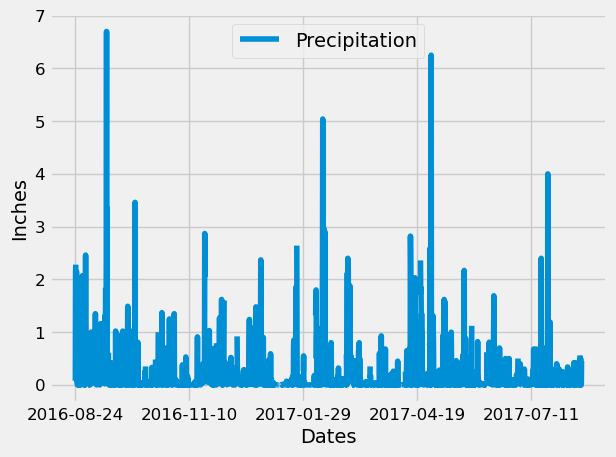

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent = session.query(Measure.date).order_by(Measure.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("The date one year from the last date in data set", one_year)

# Perform a query to retrieve the data and precipitation scores
precipit = session.query(Measure.prcp , Measure.date).filter(Measure.date > '2016-08-23').order_by(Measure.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipit, columns = ['Precipitation', 'Dates'])
df.set_index('Dates')

# Sort the dataframe by date
df_date = df.sort_values(by = 'Dates')

# Use Pandas Plotting with Matplotlib to plot the data
barplot = df_date.plot(x = 'Dates', grid = True, fontsize=12)
barplot.set_ylabel('Inches')
plt.show()


In [63]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_date.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [64]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [65]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activesta_result = session.query(Measure.station, func.count(Measure.station)).\
                    group_by(Measure.station).order_by(func.count(Measure.station).desc()).all()
activesta_result

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activesta_most = session.query(func.min(Measure.tobs), func.max(Measure.tobs), func.avg(Measure.tobs)).\
                      filter(Measure.station == 'USC00519281' ).all()
activesta_most

[(54.0, 85.0, 71.66378066378067)]

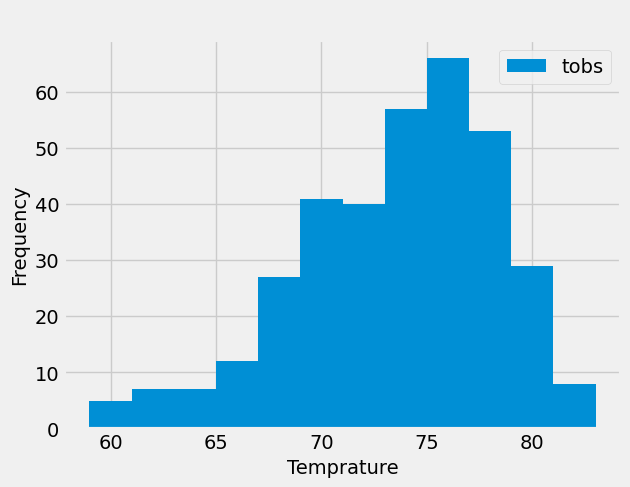

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_result =  session.query(Measure.tobs).filter(Measure.station == 'USC00519281' ).filter(Measure.date >= one_year).all()

temp_df = pd.DataFrame(temp_result, columns = ['Tobs'])
temp_df.hist(bins = 12, label="tobs")

plt.ylabel("Frequency")
plt.xlabel("Temprature")
plt.legend(loc='best')
plt.title(" ")
plt.show()

# Close Session

In [68]:
# Close Session
session.close()